# Univariate Statistics on Example Datasets

# Imports

In [71]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
import pymc as pm
# import bambi as bmb
import arviz as az

# Data

In [72]:
folder = r'data'
file = '\\EPA_CLUIN_SuperFund_Dataset.xls'
data = pd.read_excel(folder+file)
data.head(2)

,Aluminum,Arsenic,Chromium,Iron,Lead,Manganese,Thallium,Vanadium,Benzo(a)pyrene,Naphthalene,Benzo(a)pyrene (w/o)
0,6280,1.3,8.7,4600.0,16.0,39.0,0.0835,12.0,0.13500,0.003073,0.13500
1,3830,1.2,8.1,4330.0,6.4,30.0,0.0680,8.4,0.00135,0.006400,0.00135


# Data Summary

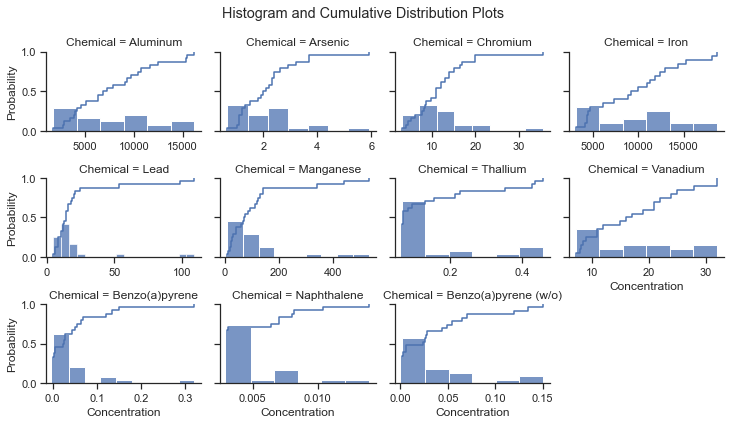

In [73]:
data_long = data.reset_index().melt(id_vars='index')
data_long.rename(columns={'index':'Sample','variable':'Chemical', 'value':'Concentration'}, inplace=True)
g = sns.FacetGrid(data=data_long, sharex=False, col_wrap=4, col='Chemical', height=2, aspect=1.3)
g.map(sns.histplot, 'Concentration', stat='probability')
g.map(sns.ecdfplot, 'Concentration')
plt.suptitle('Histogram and Cumulative Distribution Plots')
plt.tight_layout()

In [74]:
data.describe(percentiles=[.95]).T

,count,mean,std,min,50%,95%,max
Aluminum,24.0,7789.166667,4263.896887,1710.000000,7010.00000,15385.000000,16200.0000
Arsenic,24.0,2.148333,1.159414,0.660000,2.05000,3.700000,5.9000
Chromium,24.0,11.966667,6.892066,3.000000,11.00000,20.000000,35.5000
Iron,20.0,9617.500000,4812.619240,3060.000000,9615.00000,18225.000000,18700.0000
Lead,24.0,22.487500,26.829385,4.900000,14.00000,91.720000,109.0000
Manganese,24.0,113.825000,134.455773,8.600000,71.25000,425.000000,530.0000
Thallium,24.0,0.147042,0.132620,0.066000,0.07000,0.434225,0.4560
Vanadium,20.0,17.335000,8.075191,7.200000,16.50000,32.000000,32.0000
Benzo(a)pyrene,24.0,0.047454,0.073080,0.001350,0.02510,0.147750,0.3200
Naphthalene,24.0,0.004697,0.002946,0.003047,0.00305,0.010044,0.0139


# Calculate CIs

In [78]:
def simple_bootstrap(data, n=2000, statfunc=np.mean, statfunc_kwargs = {},  CI=.95):
    samples = len(data)
    stats = []
    for _ in range(n):
        sample = np.random.choice(data, samples)
        stats.append(statfunc(sample, **statfunc_kwargs))
    return np.median(stats), np.quantile(stats, CI)


In [79]:
chem  = 'Aluminum'
simple_bootstrap(data[chem])

(7795.416666666667, 9233.541666666668)

In [83]:
chem  = 'Aluminum'
simple_bootstrap(data[chem], statfunc=np.percentile, statfunc_kwargs={'q': 95})

(15385.0, 16200.0)

Leave off here - data describe with bootstrap CIs.  

In [ ]:
data.describe(percentiles=[.95])

,count,mean,std,min,50%,95%,max
Aluminum,24.0,7789.166667,4263.896887,1710.000000,7010.00000,15385.000000,16200.0000
Arsenic,24.0,2.148333,1.159414,0.660000,2.05000,3.700000,5.9000
Chromium,24.0,11.966667,6.892066,3.000000,11.00000,20.000000,35.5000
Iron,20.0,9617.500000,4812.619240,3060.000000,9615.00000,18225.000000,18700.0000
Lead,24.0,22.487500,26.829385,4.900000,14.00000,91.720000,109.0000
Manganese,24.0,113.825000,134.455773,8.600000,71.25000,425.000000,530.0000
Thallium,24.0,0.147042,0.132620,0.066000,0.07000,0.434225,0.4560
Vanadium,20.0,17.335000,8.075191,7.200000,16.50000,32.000000,32.0000
Benzo(a)pyrene,24.0,0.047454,0.073080,0.001350,0.02510,0.147750,0.3200
Naphthalene,24.0,0.004697,0.002946,0.003047,0.00305,0.010044,0.0139


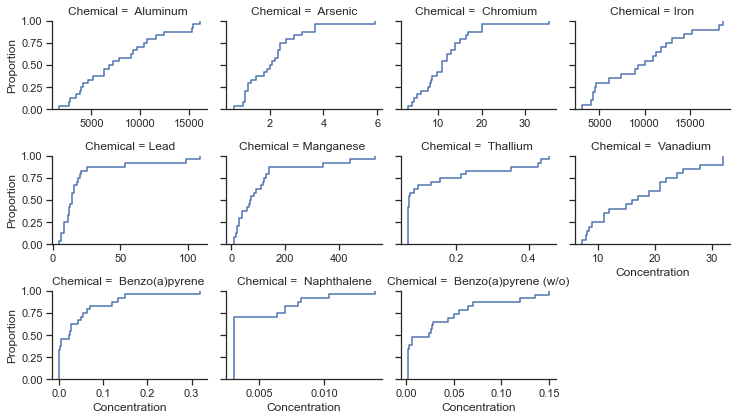

In [39]:
g = sns.FacetGrid(data=data_long, sharex=False, col_wrap=4, col='Chemical', height=2, aspect=1.3)
g.map(sns.ecdfplot, 'Concentration')